<a href="https://colab.research.google.com/github/Joan-yy/AnxietyLevelPrediction/blob/main/Copy_of_IDSRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# read dataset from the directory in google drive
from google.colab import drive
drive.mount('/content/drive')
dataset=pd.read_csv('/content/drive/MyDrive/IDS_DATA_CSV/enhanced_anxiety_dataset.csv')
# display the first 5 rows of data
dataset.info()
dataset.head(10)
# display the details about the dataset
dataset.info()
# Check for missing values
print(dataset.isna().sum())
# Check for missing values
print(dataset.isnull().sum())

# Handle missing values (example: fill numerical with mean and categorical with mode)
for col in dataset.columns:
    if dataset[col].dtype in ['int64', 'float64']:
        dataset[col].fillna(dataset[col].mean(), inplace=True)
    else:
        dataset[col].fillna(dataset[col].mode()[0], inplace=True)

# Summary statistics for categorical variables using .value_counts()
for column in dataset.columns:
    if dataset[column].dtype == 'object':  # Check for categorical columns
        print(f"\nSummary statistics for '{column}':")
        print(dataset[column].value_counts())
# Summary statistics for numeric variables using .describe()
print(dataset.describe())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  in

<ipython-input-23-2494381513>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].mean(), inplace=True)
<ipython-input-23-2494381513>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
dataset = pd.read_csv('/content/drive/MyDrive/Year2Sem2/Dataset/enhanced_anxiety_dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Categorize Anxiety Levels
Convert a numeric anxiety score (1-10) into categories (Low/Medium/High)

In [ ]:
# Define function to categorize anxiety level
def map_anxiety_level(score):
    if score <= 3.0:
        return "Low"
    elif score <= 7.0:
        return "Medium"
    else:
        return "High"

# Apply it to create a new column
dataset['Anxiety_Category'] = dataset['Anxiety Level (1-10)'].apply(map_anxiety_level)

# Check class distribution
print(dataset['Anxiety_Category'].value_counts())


Anxiety_Category
Low       5202
Medium    4784
High      1014
Name: count, dtype: int64


#2. Prepare Data for Modeling
Machine learning models need only numbers. So:


* Convert categorical columns to numeric
* Separate the input features (X) from the output (y)

In [ ]:
# Drop the original anxiety score since we are using the category - no point simpan boleh bagi model confuse
dataset = dataset.drop(['Anxiety Level (1-10)'], axis=1)

# Encode Gender safely
dataset['Gender'] = dataset['Gender'].map({'Male': 1, 'Female': 0})

# Encode all binary Yes/No columns
for col in ['Smoking', 'Family History of Anxiety', 'Dizziness', 'Medication', 'Recent Major Life Event']:
    dataset[col] = dataset[col].map({'Yes': 1, 'No': 0})

# One-hot encode Occupation
dataset = pd.get_dummies(dataset, columns=['Occupation'], drop_first=True)

# Drop rows with missing values
dataset = dataset.dropna()

# Separate features and target
X = dataset.drop('Anxiety_Category', axis=1)
y = dataset['Anxiety_Category']

# Encode target to numeric
y_encoded = y.map({'Low': 0, 'Medium': 1, 'High': 2})
class_names = ['Low', 'Medium', 'High']

#3. Split the Dataset

Split data into:

Training set (80%) → Used to train the model

Test set (20%) → Used to evaluate how well the model performs on unseen data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42) #random_state=42 ensures we get the same split every time (for reproducibility).

# Feature scaling is optional for RandomForest, but keeping for consistency
from sklearn.preprocessing import StandardScaler, label_binarize
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


#4. Train a Random Forest Model
What Is Random Forest?
It’s a model made up of many decision trees.

Each tree votes, and the majority vote wins.

It's good at handling both linear and complex data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier(random_state=42) #create random forest model
rf_model.fit(X_train_scaled, y_train) #learn from training data



RandomForestClassifier(random_state=42)

In [ ]:
# Predict on test set
y_pred = rf_model.predict(X_test_scaled) #lepas dah train data, make predictions on test data


#5. Evaluate Model
These metrics tell us how good the model is at predicting correctly.

1. Accuracy
Tells us what percentage of predictions are correct.
2. Confusion Matrix
Shows how often the model confused one class for another.
3. F1-Score
A balance between precision and recall.
Useful when classes are imbalanced (e.g., more "Medium" cases than "Low").
ROC-AUC (Optional – for multiclass)
Random Forest supports probability-based predictions, which ROC-AUC uses.

1. Accuracy Score: 0.8006314839873703

2. F1 Score
F1 Score (Macro): 0.8512802200209602

3. ROC-AUC:
ROC AUC Score: 0.9161304737711701

Classification Report:
               precision    recall  f1-score   support

         Low       0.78      0.81      0.79      1032
      Medium       0.79      0.76      0.77       990
        High       0.99      0.98      0.99       195

    accuracy                           0.80      2217
   macro avg       0.85      0.85      0.85      2217
weighted avg       0.80      0.80      0.80      2217


4. Confusion Matrix:


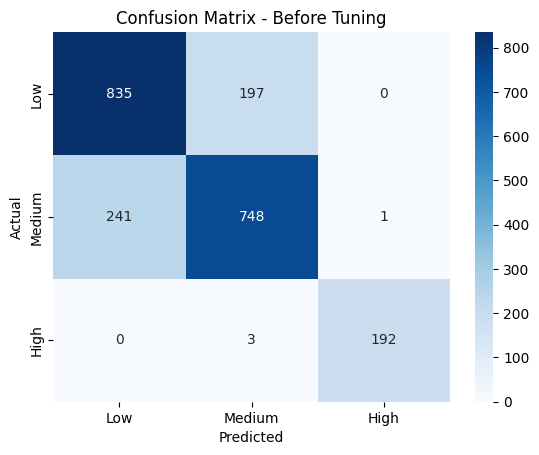

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

# Accuracy
print("1. Accuracy Score:", accuracy_score(y_test, y_pred))

# F1-Score
print("\n2. F1 Score")
print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))
#print(classification_report(y_test, y_pred))

# ROC-AUC
# Convert text labels to binary matrix
print("\n3. ROC-AUC:")
y_test_bin = label_binarize(y_test, classes=[0,1,2])
y_pred_proba = rf_model.predict_proba(X_test_scaled)

# ROC AUC score (average)
print("ROC AUC Score:", roc_auc_score(y_test_bin, y_pred_proba, average='macro', multi_class='ovr'))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

# Confusion Matrix
print("\n4. Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels= class_names, yticklabels= class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Before Tuning")
plt.show()

#Interpretation before Hyperparameter Tuning

1. Accuracy Score: 0.8006
- Model correctly predicted the anxiety level in about 80.06% of the time. This is quite a solid performance.

2. F1 Score: 0.8512
- This F1 score shows that the model handles all classes equally and no severe imbalance in prediction performance.
- High anxiety detection is excellent, near-perfect F1-score (0.99).
- Low and Medium classes are moderately predicted with some confusion between the two.

3. ROC-AUC Score: 0.9161
- Very good separability between classes based on predicted probabilities.
- Model is good at ranking correct predictions higher than incorrect ones.

4. Confusion Matrix
<br> From the matrix:

- Low: 835 correctly classified, 197 misclassified as Medium.

- Medium: 748 correct, 241 misclassified as Low and only 1 misclassified has high.

- High: 192 correct, only 3 misclassified as Medium.

>Low vs Medium classes are the most confused:
- 241 Medium cases misclassified as Low.
- 197 Low cases misclassified as Medium.

-No High cases were misclassified as Low, which is important in a mental health context, severe anxiety is not missed.

## 6. Hyperparameter Tuning
- using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV #import GridSearchCV

#Define hyperparameter grid
# Try all combinations of these values and pick the best one based on accuracy or F1-score
#param_grid = {
#    'n_estimators': [100, 200],
#    'max_depth': [None, 10, 20],
#    'min_samples_split': [2, 5],
#    'max_features': ['sqrt', 'log2']}
param_grid = { #jojo ver
    'n_estimators': [100, 300],
    'max_depth': [None, 20, 40],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

print(y_train.value_counts())

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Grid search jojo ver: cv change to 3 -> 5, verbose 3 -> 1
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='f1_macro',
                           verbose=1,
                           n_jobs=-1) #cv=3 means train on 2/3, test on 1/3, repeated 3 times

# Train with best hyperparameters
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model
best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test_scaled)
y_pred_proba_tuned = best_rf.predict_proba(X_test_scaled)

print("Unique values in y_test:", y_test.unique())
print("Unique values in y_pred_tuned:", pd.Series(y_pred_tuned).unique())

import pandas as pd

predictions_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred_tuned
})

predictions_df.to_csv('tuned_rf_predictions.csv', index=False)


Anxiety_Category
0    2486
1    2180
2     504
Name: count, dtype: int64
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Unique values in y_test: [1 0 2]
Unique values in y_pred_tuned: [1 0 2]


1. Accuracy Score: 0.8051420838971584

2. F1 Score:
0.85537478626301

3. ROC-AUC:
ROC AUC Score: 0.9199332665843487

Classification Report:
               precision    recall  f1-score   support

         Low       0.79      0.80      0.79      1032
      Medium       0.79      0.77      0.78       990
        High       0.99      0.99      0.99       195

    accuracy                           0.81      2217
   macro avg       0.86      0.85      0.86      2217
weighted avg       0.81      0.81      0.81      2217


4. Confusion Matrix:


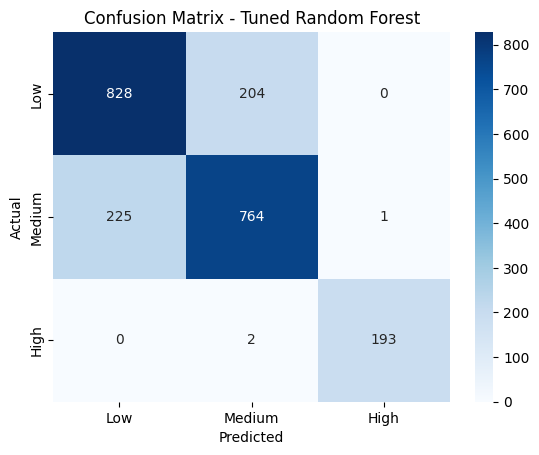

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
y_pred_tuned = best_rf.predict(X_test_scaled)
print("1. Accuracy Score:", accuracy_score(y_test, y_pred_tuned))

# F1 Score
print("\n2. F1 Score:")
print(f1_score(y_test, y_pred_tuned, average='macro'))

# ROC-AUC Score
print("\n3. ROC-AUC:")
# Binarize true labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Get class probability predictions from the tuned model
y_pred_proba_tuned = best_rf.predict_proba(X_test_scaled)

# Compute macro-average ROC AUC
print("ROC AUC Score:", roc_auc_score(y_test_bin, y_pred_proba_tuned, average='macro', multi_class='ovr'))

print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned, target_names=class_names))

# Confusion Matrix
print("\n4. Confusion Matrix:")
# Use integer format in the annotations
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned Random Forest')
plt.show()

In [ ]:
import joblib
# Save model
joblib.dump(rf_model, 'model.pkl')

# Save columns to use in Streamlit app
joblib.dump(X.columns.tolist(), 'model_features.pkl')

from google.colab import files
files.download('model.pkl')
files.download('model_features.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Interpretation After Hyperparameter Tuning

1. Accuracy Score: 0.8051
- Tuned model show slight improvement in overall prediction accuracy.

2. Confusion Matrix
- Confusion matrix patterns are very similar, showing the base model was already strong, but tuning added small refinements.
- Misclassifications are marginally reduced for some classes.

3. F1 Score: 0.8554
- Model slightly improved in balancing performance across all classes compared to before tuning.

4. ROC-AUC Score: 0.9199
- 	Slight increase increase in ROC-AUC score meaning the model got marginally better at ranking probabilities.



# 7. Conclusion

Despite tuning the Random Forest model:

- Performance remains nearly the same, with only small improvements in some class-specific predictions.

- This could mean that the model already hit its peak, meaning the original model is already performing well as it is

- This could also mean that the data itself is the limiting factor, not the parameters

Other possible reasons:
- The dataset has class overlap
Features used to separate the Low and Medium anxiety are probably not distinct enough since the model mostly misclassifies Low and Medium anxiety cases, not High anxiety cases
- Therefore, it could also be a data separability issue, not a model problem